In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wines = pd.read_csv("/content/wines.csv")
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Example: choose features and target
X = wines.drop("quality", axis=1)   # or correct target column
y = wines["quality"]

X = pd.get_dummies(X, drop_first=True)
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Variance score - R^2: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.54
Variance score - R^2: 0.27


In [7]:
import statsmodels.api as sm
mod = sm.OLS(wines["quality"], wines[["fixed_acidity",  "volatile_acidity", "citric_acid", "residual_sugar",
                  "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
                  "pH", "sulphates", "alcohol"]])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.710e+04
Date:                Wed, 14 Jan 2026   Prob (F-statistic):                        0.00
Time:                        11:26:56   Log-Likelihood:                         -7226.4
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6486   BIC:                                  1.455e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0100      0.010      1.047      0.295      -0.009       0.029
volatile_acidity        -1.4573      0.072    -20.130      0.000      -1.599      -1.315
citric_acid             -0.1137      0.080     -1.426      0.154      -0.270       0.043
residual_sugar           0.0221      0.002      9.259      0.000       0.017       0.027
chlorides               -0.7955      0.326     -2.436      0.015      -1.436      -0.155
free_sulfur_dioxide      0.0060      0.001      7.966      0.000       0.005       0.007
total_sulfur_dioxide    -0.0022      0.000     -8.228      0.000      -0.003      -0.002
density                  1.9225      0.281      6.837      0.000       1.371       2.474
pH                       0.1641      0.069      2.384      0.017       0.029       0.299
sulphates                0.6408      0.071      8.998      0.000       0.501       0.780
alcohol                  0.3333      0.009     37.212      0.000       0.316       0.351
==============================================================================
Omnibus:                      140.142   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.565
Skew:                           0.010   Prob(JB):                     2.21e-68
Kurtosis:                       4.073   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

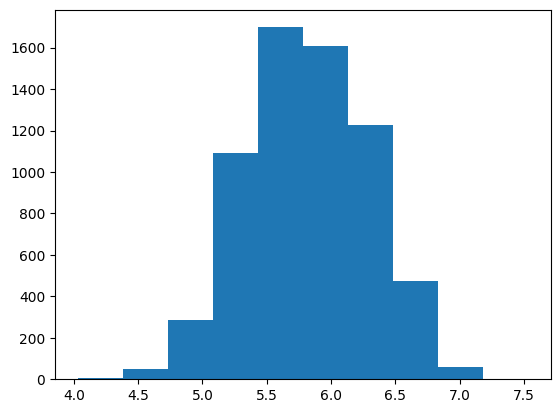

In [8]:
plt.hist(res.predict())
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
titanic = pd.read_csv("/content/titanic.csv")
pd.set_option("display.max_columns",50)
titanic.head()

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# choose features and target
x = titanic[["pclass", "sex", "age", "fare", "embarked"]]
y = titanic["survived"]

# handle missing values
x["age"] = x["age"].fillna(x["age"].median())
x["fare"] = x["fare"].fillna(x["fare"].median())
x["embarked"] = x["embarked"].fillna(x["embarked"].mode()[0])

# convert categorical variables
x = pd.get_dummies(x, drop_first=True)

# split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# train model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# evaluate
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Variance score - R^2: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.16
Variance score - R^2: 0.34


/tmp/ipython-input-1117928498.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["age"] = x["age"].fillna(x["age"].median())
/tmp/ipython-input-1117928498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["fare"] = x["fare"].fillna(x["fare"].median())
/tmp/ipython-input-1117928498.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [19]:
import statsmodels.formula.api as smf

mod = smf.glm(formula="survived ~ pclass + sex + age + sibsp  + embarked", data=titanic, family=sm.families.Binomial())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1044
Model:                            GLM   Df Residuals:                     1037
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -477.59
Date:                Wed, 14 Jan 2026   Deviance:                       955.18
Time:                        11:35:37   Pearson chi2:                 1.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6730      0.407      6.573      0.000       1.876       3.470
embarked[T.Q]    -1.4720      0.444     -3.315      0.001      -2.342      -0.602
embarked[T.S]    -0.6921      0.207     -3.345      0.001      -1.098      -0.287
pclass           -1.0240      0.117     -8.756      0.000      -1.253      -0.795
sex               2.6300      0.176     14.925      0.000       2.285       2.975
age              -0.0379      0.007     -5.721      0.000      -0.051      -0.025
sibsp            -0.3271      0.102     -3.193      0.001      -0.528      -0.126
=================================================================================
"""

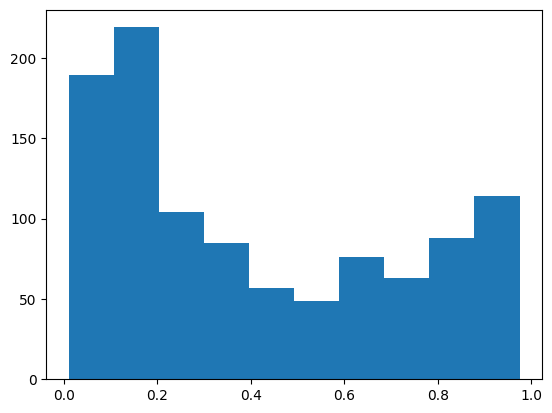

In [20]:
plt.hist(res.predict())
plt.show()